In [1]:
import pandas as pd

dta_07 = pd.read_stata("wls_plg_13_07.dta", convert_categoricals=False) # raw data

# Drop the problematic column
dta_07 = dta_07.drop(columns=["nn118rer"])

## Get the same subjects from the main analysis data from raw data

In [2]:
merged_df = pd.read_csv("wls_merged_categorization_standardization.csv") # main analysis data

In [3]:
dta_07['subject_id'] = dta_07['subject_id'].astype(str)
merged_df['subject_id'] = merged_df['subject_id'].astype(str)

common_ids = pd.Index(dta_07["subject_id"]).intersection(merged_df["subject_id"])

dta_07_filtered = dta_07[dta_07["subject_id"].isin(common_ids)]

dta_07_filtered['subject_id'] # n = 9020

0        1012160
2        1036441
7        1012207
10       1025046
11       1002295
          ...   
19038    1035205
19039    1017577
19040    1011329
19043    1010056
19044    1007314
Name: subject_id, Length: 9020, dtype: object

In [4]:
gps_cols = [col for col in merged_df.columns if 'GPS' in col]
gps_cols.append('subject_id')
gps_cols

merged_gps = merged_df[gps_cols]
merged_gps

,AD_GPS,AlcoholDEP_GPS,Anxiety_GPS,ASD_GPS,ASP_GPS,BIP_GPS,Cannabis_GPS,CP_GPS,Cross_GPS,Depression_GPS,...,MDD_GPS,Neuroticism_GPS,OCD_GPS,PTSD_GPS,Risk4PC_GPS,RiskTOL_GPS,SCZ_GPS,Smoker_GPS,Snoring_GPS,subject_id
0,-0.503906,-0.273840,-0.745905,-0.587782,-0.955491,-0.316919,0.002512,-0.564925,0.637271,0.331655,...,0.465951,0.329808,1.345965,-0.196509,0.062549,-0.169912,1.388719,0.809219,-1.689018,1000013
1,1.381578,0.173937,1.186610,1.744036,-1.756468,0.010834,-0.381932,-1.632867,-0.315408,-1.086371,...,-0.133725,0.246318,0.178136,-0.243998,0.996212,0.289031,-0.035035,1.624974,1.080492,1000020
2,-0.447515,0.191155,-1.617729,-0.128934,-1.983753,1.473440,0.536602,-0.642195,0.842159,-1.056090,...,0.301885,-0.700917,-0.170502,-1.296874,-0.210639,-0.488430,1.424066,1.399911,0.177919,1000023
3,0.577968,-0.246987,-0.562361,-0.259228,-0.071442,-0.232303,0.401650,0.044155,1.388000,0.194627,...,0.596798,-0.514723,1.014356,0.536894,0.472459,0.923012,-0.193904,0.118598,0.410175,1000024
4,-0.055258,-2.701374,0.673524,1.242671,-0.573791,-1.121884,-1.858885,-0.936115,-0.228706,-0.821937,...,-0.481675,0.750450,-0.380807,-0.743163,1.072870,-0.196942,0.502213,-0.192032,-0.595359,1000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9000,-0.636622,0.349890,0.636130,-0.113215,0.640529,0.171389,-0.496998,2.198028,-0.628083,-0.537546,...,-0.384361,-1.918153,-0.542987,0.161588,-0.670823,-2.168653,-1.830671,-0.783025,0.376361,1038710
9001,0.746218,-0.164429,0.283076,-0.149476,-0.250645,0.959787,1.107622,0.558140,0.876798,0.504259,...,2.221713,-0.087273,0.166231,0.073904,0.528015,0.453692,0.612973,-0.719182,0.468981,1038719
9002,-1.175890,0.326197,-2.019532,-1.561166,1.132548,0.809029,-0.149956,0.479945,0.442854,1.258065,...,-0.903443,0.950882,-0.136938,-0.053077,0.802865,0.637124,-0.270751,0.180389,-0.710445,1038752
9003,0.686269,-0.519278,-1.140297,1.513742,0.787055,1.094754,0.637044,-1.031659,1.666657,2.176716,...,0.061246,0.867724,0.492368,0.944384,-0.121210,0.304484,0.129179,-0.839710,0.930165,1038764


In [5]:
dta_07_filtered.set_index('subject_id', inplace=True)
merged_gps.set_index('subject_id', inplace=True)
dta_07_filtered = dta_07_filtered.join(merged_gps, how='left').reset_index()

In [6]:
dta_07_filtered['z_in001rei']

0       26.0
1       20.0
2        NaN
3       26.0
4        NaN
        ... 
9015     NaN
9016    19.0
9017    22.0
9018    20.0
9019    26.0
Name: z_in001rei, Length: 9020, dtype: float64

## Make composites

In [7]:
import numpy as np

x_cols = [
    "z_in001rei",
    "z_in019rei",
    "z_in072rec",
    "z_in010rei",
    "z_ih025rei",
    "z_rn004red",
    "z_rn012red",
    "z_in037rei",
    "z_in046rei",
    "z_rh005rec",
    "z_in028rei",
    "z_in070rec",
    "z_mv056re",
    "z_rn014rei",
    "z_iv204rer",
    "z_rn008red",
    "z_gr061rpi1",
    "gn114rec"
]

y_cols = [
    "z_hx332re", "z_hx333re", "z_hx334re", "z_hx335re",
    "z_hu002re", "z_hu024re", "z_ju013rer", "z_jxsf2rec",
    "z_ju001rec", "z_ju003rer"
]

variables = x_cols + y_cols 

# map variable names to raw data columns
y_cols_mapping = {
    "z_hx332re": "Unhappy_fourweeks_R6",
    "z_hx333re": "Depressed_fourweeks_binary_R6",
    "z_hx334re": "Depressed_fourweeks_cont_R6",
    "z_hx335re": "Depressed_fourweeks_advanced_binary_R6",
    "z_hu002re": "LoseInterest_binary_R6",
    "z_hu024re": "Depression_num_R6",
    "z_ju013rer": "Depression_days_R6",
    "z_jxsf2rec": "SF12_mental_R6",
    "z_ju001rec": "Depression_score_R6",
    "z_ju003rer": "Blue_days_R6"}

x_cols_mapping = {
    "z_in001rei": "Autonomy_R5_std",
    "z_in019rei": "PersonalGrowth_R5_std",
    "z_in072rec": "Mattering_R5_std",
    "z_in010rei": "EnvironmentalMastery_R5_std",
    "z_ih025rei": "Neuroticism_R5_std",
    "z_rn004red": "EnvironmentalMastery_R4_z_std",
    "z_rn012red": "SelfAcceptance_R4_z_std",
    "z_in037rei": "PurposeinLife_R5_std",
    "z_in046rei": "SelfAcceptance_R5_std",
    "z_rh005rec": "Neuroticism_R4_z_std",
    "z_in028rei": "PositiveRelationship_R5_std",
    "z_in070rec": "Optimism_R5_std",
    "z_mv056re": "Support_money_R4_std",
    "z_rn014rei": "PsychWellbeing_R4_std",
    "z_iv204rer": "Critical_social_R5_std",
    "z_rn008red": "PositiveRelationship_R4_z_std",  
    "z_gr061rpi1": "Household_RetirePlan_value1_R5_std",
    "gn114rec": "PsychWellbeing_R5_original_R5_std"
}

# transform all negative-coded values into nan
dta_07_filtered.loc[:, variables] = dta_07_filtered.loc[:, variables].mask(
    dta_07_filtered.loc[:, variables] < 0, np.nan
)

dta_07_filtered.rename(columns={**x_cols_mapping, **y_cols_mapping}, inplace=True)

In [8]:
# scale each variable before averaging into a composite

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_cols_new = list(x_cols_mapping.values())
dta_07_filtered[x_cols_new] = scaler.fit_transform(dta_07_filtered[x_cols_new])

In [9]:
# Risk composite 1
std_columns_for_composite = [
    "EnvironmentalMastery_R5_std",
    "Neuroticism_R5_std",
    "EnvironmentalMastery_R4_z_std",
    "SelfAcceptance_R4_z_std",
    "PurposeinLife_R5_std",
    "SelfAcceptance_R5_std",
    "Neuroticism_R4_z_std",
    "PositiveRelationship_R5_std",
    "Optimism_R5_std",
    "Support_money_R4_std",
    "PsychWellbeing_R4_std",
    "Critical_social_R5_std"
]

dta_07_filtered["Risk_composite_1"] = dta_07_filtered[std_columns_for_composite].mean(axis=1, skipna=False)


# Risk composite 2
std_columns_for_composite2 = [
    "EnvironmentalMastery_R5_std",
    "SelfAcceptance_R5_std",
    "PurposeinLife_R5_std",
    "Neuroticism_R5_std",
    "SelfAcceptance_R4_z_std",
    "Neuroticism_R4_z_std",
    "PositiveRelationship_R5_std",
    "EnvironmentalMastery_R4_z_std",
    "Optimism_R5_std",
    "Household_RetirePlan_value1_R5_std",  
    "PsychWellbeing_R4_std",
    "Depression_GPS",                  
    "Critical_social_R5_std",
    "Support_money_R4_std",
    "PositiveRelationship_R4_z_std"
]

dta_07_filtered["Risk_composite_2"] = dta_07_filtered[std_columns_for_composite2].mean(axis=1, skipna=False)

In [10]:
binary_outcomes = [
    "Depressed_fourweeks_binary_R6",
    "Depressed_fourweeks_advanced_binary_R6",
    "LoseInterest_binary_R6"
]

# 2 (coded 'no') -> 0
dta_07_filtered[binary_outcomes] = dta_07_filtered[binary_outcomes].replace(2, 0)

In [11]:

# PsychWellbeing_R5
psychwellbeing_vars = [
    "Autonomy_R5_std",
    "EnvironmentalMastery_R5_std",
    "PersonalGrowth_R5_std",
    "PositiveRelationship_R5_std",
    "PurposeinLife_R5_std",
    "SelfAcceptance_R5_std"
]

dta_07_filtered["PsychWellbeing_R5"] = dta_07_filtered[psychwellbeing_vars].mean(axis=1, skipna=False)

# PersonalResource_R5
personalresource_vars = [
    "Autonomy_R5_std",
    "EnvironmentalMastery_R5_std",
    "PersonalGrowth_R5_std",
    "PositiveRelationship_R5_std",
    "PurposeinLife_R5_std",
    "SelfAcceptance_R5_std",
    "Optimism_R5_std",
    "Mattering_R5_std"
]

dta_07_filtered["PersonalResource_R5"] = dta_07_filtered[personalresource_vars].mean(axis=1, skipna=False)

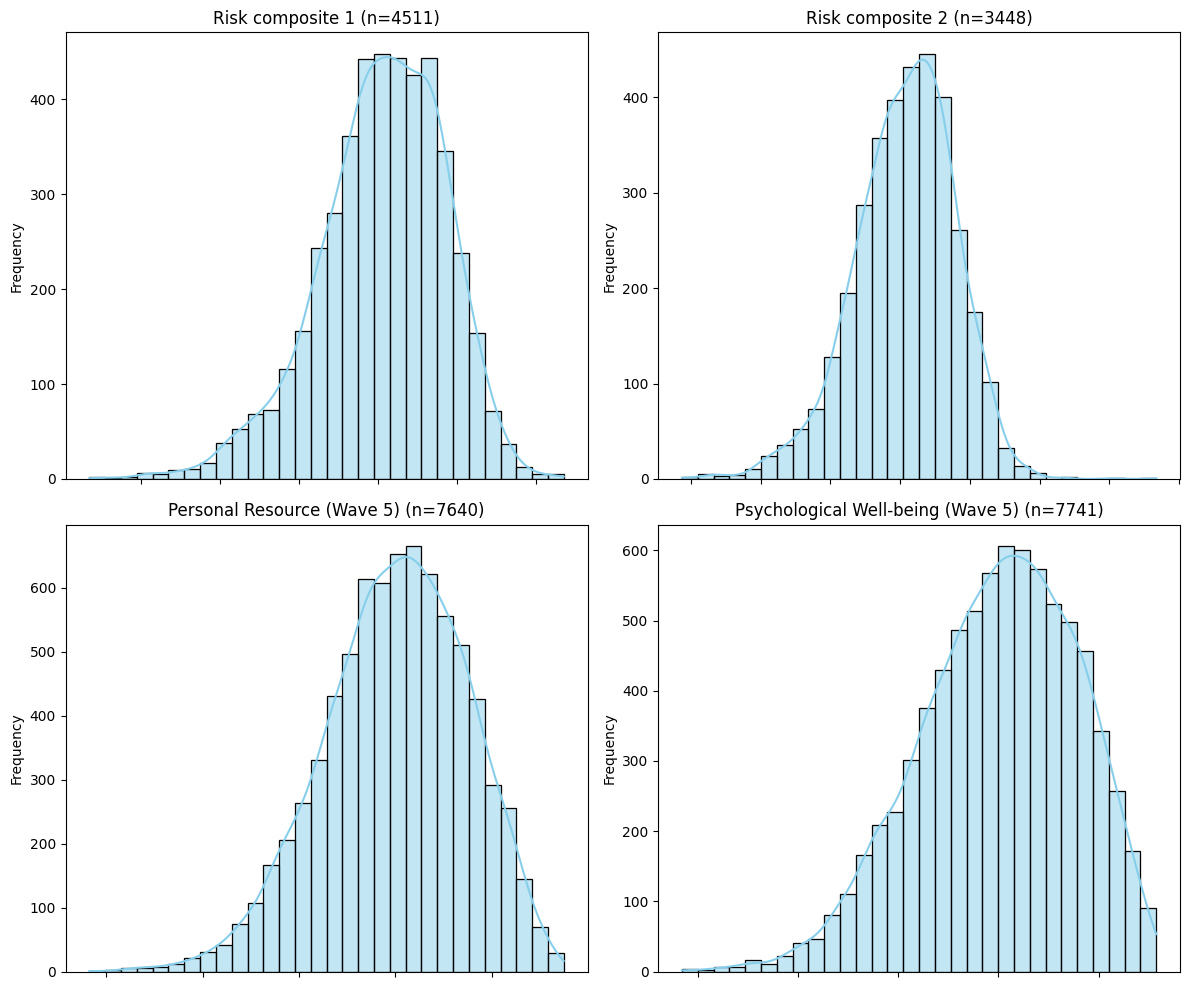

In [12]:
# histogram of composites

import matplotlib.pyplot as plt
import seaborn as sns

variables = ['Risk_composite_1', 'Risk_composite_2', 'PersonalResource_R5', 'PsychWellbeing_R5']
titles = ['Risk composite 1', 'Risk composite 2', 'Personal Resource (Wave 5)', 'Psychological Well-being (Wave 5)']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    data_nonan = dta_07_filtered[var].dropna()
    sns.histplot(data_nonan, bins=30, kde=True, color='skyblue', ax=axes[i])
    
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{titles[i]} (n={len(data_nonan)})')
    
    axes[i].set_xlabel('')
    axes[i].set_xticklabels([])

plt.tight_layout()
fig.savefig("histogram_composite.pdf", dpi=300, bbox_inches="tight")
plt.show()


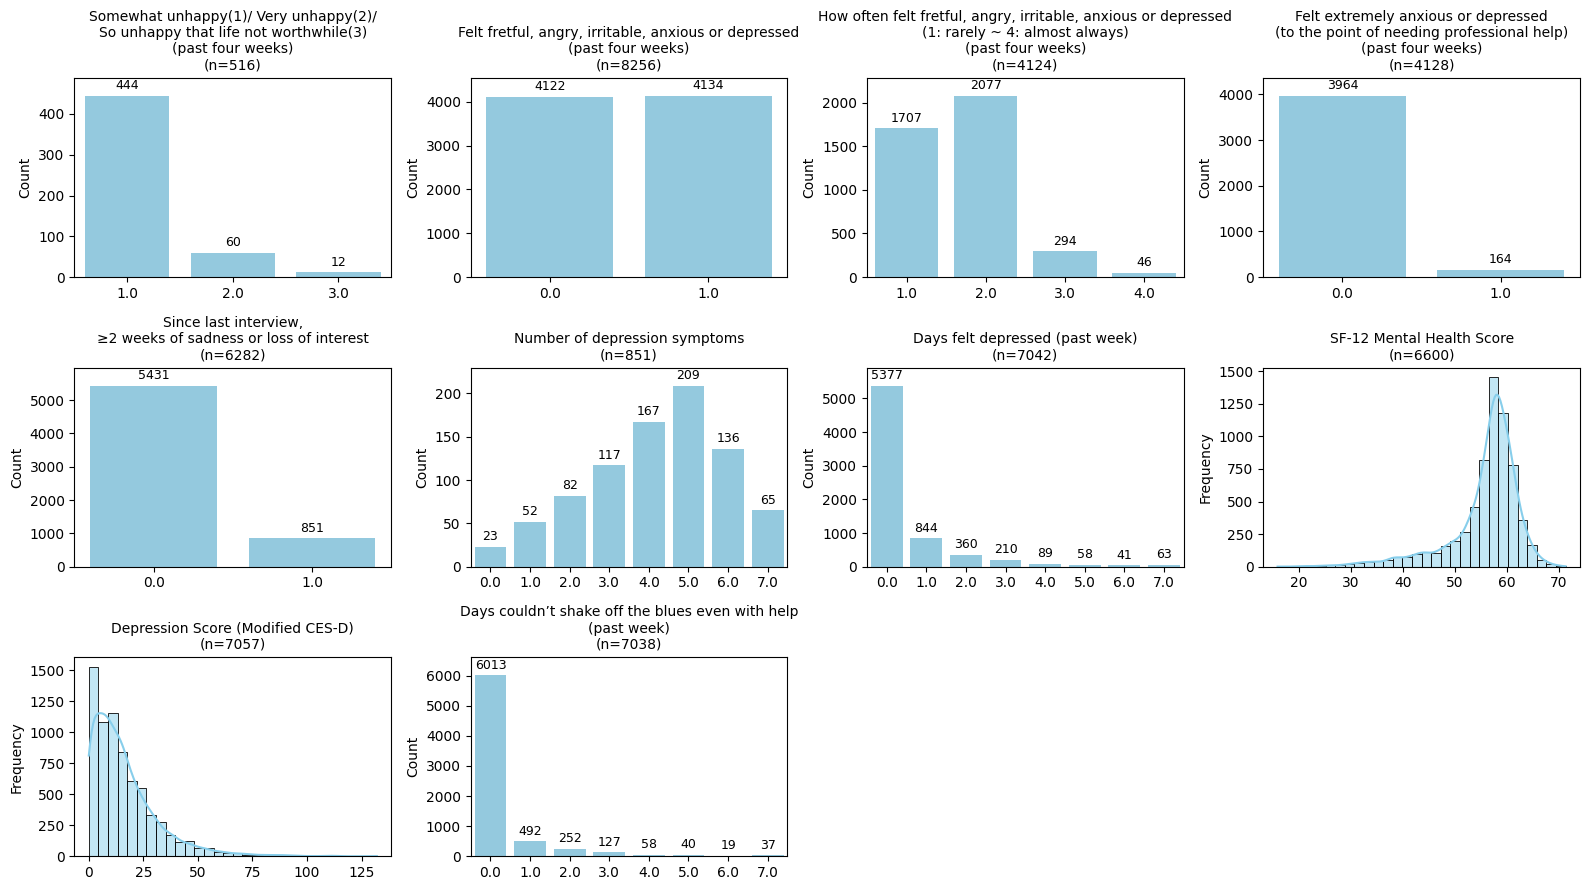

In [34]:
# histogram of depression-related outcomes 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

outcome_vars = [
    "Unhappy_fourweeks_R6",
    "Depressed_fourweeks_binary_R6",
    "Depressed_fourweeks_cont_R6",
    "Depressed_fourweeks_advanced_binary_R6",
    "LoseInterest_binary_R6",
    "Depression_num_R6",
    "Depression_days_R6",
    "SF12_mental_R6",
    "Depression_score_R6",
    "Blue_days_R6"
]

continuous_vars = ["SF12_mental_R6", "Depression_score_R6"]

outcome_labels = {
    "Unhappy_fourweeks_R6": "Somewhat unhappy(1)/ Very unhappy(2)/\nSo unhappy that life not worthwhile(3)\n(past four weeks)",
    "Depressed_fourweeks_binary_R6": "Felt fretful, angry, irritable, anxious or depressed\n(past four weeks)",
    "Depressed_fourweeks_cont_R6": "How often felt fretful, angry, irritable, anxious or depressed\n(1: rarely ~ 4: almost always)\n(past four weeks)",
    "Depressed_fourweeks_advanced_binary_R6": "Felt extremely anxious or depressed\n(to the point of needing professional help)\n(past four weeks)",
    "LoseInterest_binary_R6": "Since last interview,\n≥2 weeks of sadness or loss of interest",
    "Depression_num_R6": "Number of depression symptoms",
    "Depression_days_R6": "Days felt depressed (past week)",
    "SF12_mental_R6": "SF-12 Mental Score",
    "Depression_score_R6": "Depression Score (Modified CES-D)",
    "Blue_days_R6": "Days couldn’t shake off the blues even with help\n(past week)"
}

continuous_labels = {
    "SF12_mental_R6": "SF-12 Mental Health Score",
    "Depression_score_R6": "Depression Score (Modified CES-D)"
}

all_labels = {**outcome_labels, **continuous_labels}


# figure
n_vars = len(outcome_vars)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.flatten()


for i, var in enumerate(outcome_vars):
    data_nonan = dta_07_filtered[var].dropna()
    
    if var in continuous_vars:
        sns.histplot(data_nonan, bins=30, kde=True, color="skyblue", ax=axes[i])
        axes[i].set_ylabel("Frequency")
    else:
        sns.countplot(x=var, data=dta_07_filtered, color="skyblue", ax=axes[i])
        axes[i].set_ylim(0, max(data_nonan.value_counts()) * 1.1)
        
        for bar in axes[i].patches:
            height = bar.get_height()
            axes[i].text(
                bar.get_x() + bar.get_width()/2,
                height + 0.02 * max(data_nonan.value_counts()),
                str(int(height)),
                ha='center', va='bottom', fontsize=9
            )
        axes[i].set_ylabel("Count")
        axes[i].set_xticks(range(len(data_nonan.value_counts())))
        axes[i].set_xticklabels([str(x) for x in sorted(data_nonan.unique())], rotation=0)


    axes[i].set_xlabel("")

    label = all_labels.get(var, var)
    axes[i].set_title(f"{label}\n(n={len(data_nonan)})", fontsize=10)

for j in range(len(outcome_vars), len(axes)):
    axes[j].remove()

plt.tight_layout()
plt.savefig("outcome_distribution.pdf", dpi=300, bbox_inches="tight")
plt.show()

## Correlation analysis

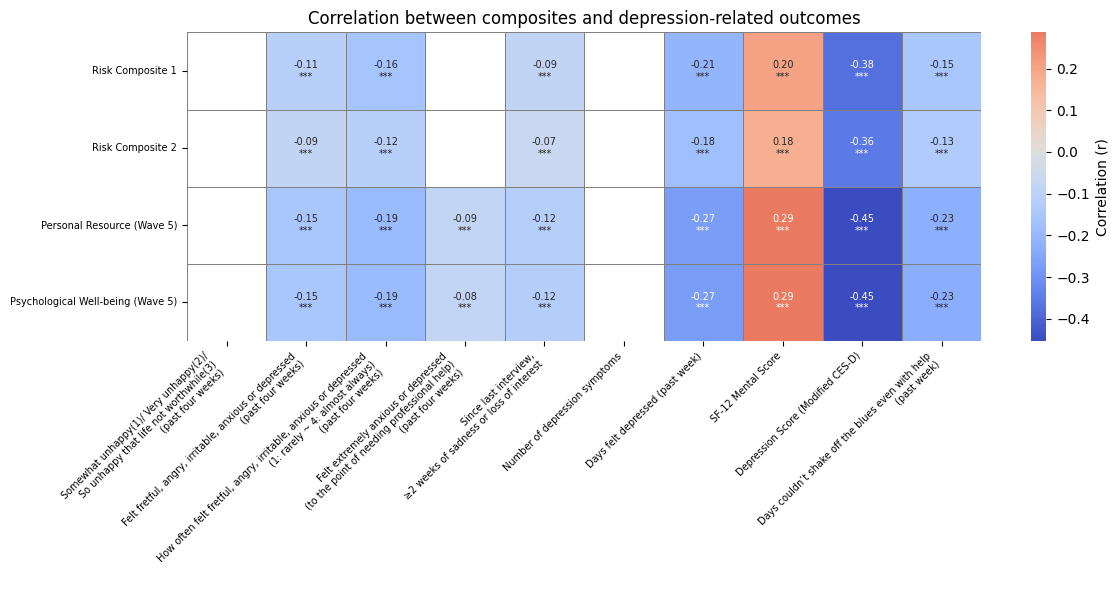

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests

x_vars = [
    "Risk_composite_1",
    "Risk_composite_2",
    "PersonalResource_R5",
    "PsychWellbeing_R5"
]


x_labels = {
    "Risk_composite_1": "Risk Composite 1",
    "Risk_composite_2": "Risk Composite 2",
    "PersonalResource_R5": "Personal Resource (Wave 5)",
    "PsychWellbeing_R5": "Psychological Well-being (Wave 5)"
}


# Correlation
corrs = pd.DataFrame(index=x_vars, columns=outcome_vars, dtype=float)
pvals = pd.DataFrame(index=x_vars, columns=outcome_vars, dtype=float)

for x in x_vars:
    for y in outcome_vars:
        valid_idx = dta_07_filtered[[x, y]].dropna().index
        if len(valid_idx) > 1:
            r, p = pearsonr(dta_07_filtered.loc[valid_idx, x], dta_07_filtered.loc[valid_idx, y])
            corrs.loc[x, y] = r
            pvals.loc[x, y] = p

# FDR-correction
pvals_fdr_byx = pvals.copy()
for x in x_vars:
    pvals_x = pvals.loc[x].dropna().values
    if len(pvals_x) > 0:
        rej, pval_fdr, _, _ = multipletests(pvals_x, method="fdr_bh")
        pvals_fdr_byx.loc[x, pvals.loc[x].dropna().index] = pval_fdr

annot_text = pd.DataFrame(index=x_vars, columns=outcome_vars, dtype=str)
for x in x_vars:
    for y in outcome_vars:
        r_val = corrs.loc[x, y]
        p_fdr = pvals_fdr_byx.loc[x, y]
        if pd.notna(r_val) and pd.notna(p_fdr):
            if p_fdr < 0.001:
                star = "***"
            elif p_fdr < 0.01:
                star = "**"
            elif p_fdr < 0.05:
                star = "*"
            else:
                star = ""
            annot_text.loc[x, y] = f"{r_val:.2f}\n{star}"
        else:
            annot_text.loc[x, y] = ""

# Heatmap data : fdr-p > 0.05 cells are put to NaN
corrs_sig = corrs.copy()
corrs_sig[pvals_fdr_byx > 0.05] = np.nan

plt.figure(figsize=(12, 6))
sns.heatmap(
    corrs_sig.astype(float),
    annot=annot_text,
    fmt="",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"label": "Correlation (r)"},
    mask=corrs_sig.isna(),
    annot_kws={"size": 7}
)


plt.xticks(
    ticks=np.arange(len(outcome_vars)) + 0.5,
    labels=[outcome_labels[y] for y in outcome_vars],
    rotation=45, ha='right', fontsize=7
)
plt.yticks(
    ticks=np.arange(len(x_vars)) + 0.5,
    labels=[x_labels[x] for x in x_vars],
    rotation=0, fontsize=7
)

plt.title("Correlation between composites and depression-related outcomes")
plt.tight_layout()

plt.savefig("correlation_heatmap.pdf", dpi=300, bbox_inches="tight")
plt.show()


In [32]:
# Correlation dataframe

outcome_labels_clean = {k: v.replace("\n", " ") for k, v in outcome_labels.items()}

def rename_df(df, x_labels, outcome_labels_clean):
    df = df.copy()
    df.index = [x_labels[x] for x in df.index]
    df.columns = [outcome_labels_clean[y] for y in df.columns]
    return df

corrs_renamed = rename_df(corrs, x_labels, outcome_labels_clean)
pvals_renamed = rename_df(pvals, x_labels, outcome_labels_clean)
pvals_fdr_renamed = rename_df(pvals_fdr_byx, x_labels, outcome_labels_clean)

records = []
for x in corrs_renamed.index:
    for y in corrs_renamed.columns:
        r = corrs_renamed.loc[x, y]
        p = pvals_renamed.loc[x, y]
        fdr = pvals_fdr_renamed.loc[x, y]
        if pd.notna(r):
            records.append({
                'X': x,
                'Y': y,
                'r': r,
                'p_value': p,
                'p_value_FDR': fdr
            })

combined_df = pd.DataFrame.from_records(records)

combined_df.to_csv("correlation_results.csv", index=False)


## Logistic regression for binary outcomes

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

results = []

for x in x_vars:
    for y in binary_outcomes:
        df = dta_07_filtered[[x, y]].dropna()
        if df.empty:
            results.append({'x': x, 'y': y, 'coef': None, 'pval': None,
                            'OR': None, 'CI_lower': None, 'CI_upper': None})
            continue

        X = sm.add_constant(df[[x]])
        model = sm.Logit(df[y], X).fit(disp=0)
        
        coef = model.params[x]
        se = model.bse[x]
        pval = model.pvalues[x]
        OR = np.exp(coef)
        CI_lower, CI_upper = np.exp(coef - 1.96 * se), np.exp(coef + 1.96 * se)
        
        results.append({
            'x': x, 'y': y, 'coef': coef, 'p-value': pval,
            'OR': OR, 'CI_lower': CI_lower, 'CI_upper': CI_upper
        })

results_df = pd.DataFrame(results)


# FDR-correction
from statsmodels.stats.multitest import multipletests

mask = results_df['p-value'].notna()
if mask.any():
    results_df.loc[mask, 'FDR-p'] = multipletests(results_df.loc[mask, 'p-value'], method='fdr_bh')[1]

results_df['Significance'] = results_df['FDR-p'].fillna(1) < 0.05

results_df.to_csv('logistic_results.csv', index=False)